In [1]:
from SubsidieModel import SubsidieModel
from SubsidieModel import AdoptionAgent
from VermogenInkomen import genereer_random_vermogen




62458.75041675717


In [2]:
from SubsidieModel import gemiddelde_leeftijd_auto

model = SubsidieModel()

leeftijd = gemiddelde_leeftijd_auto(model)
print(leeftijd)
for i in range(13):
    model.step()

leeftijd = gemiddelde_leeftijd_auto(model)
print(leeftijd)


Hij wordt aangeroepen
Hij is gereset


/Users/michielvanhouten/Dropbox/Mac/Documents/GitHub/abm/.venv/lib/python3.9/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


47.905660377358494
59.73908355795148


In [3]:
cell_0_0 = model.grid.get_cell_list_contents([(0, 0)])

if cell_0_0:
    print("Agent aanwezig op cel (1, 1)")
else:
    print("Geen agent aanwezig op cel (1, 1)")

for agent in model.schedule.agents:
    position = agent.pos
    agent_type = agent.agent_type
    print(f"Agent Type at position ({position[0]} , {position[1]}): {agent_type}")

Agent aanwezig op cel (1, 1)
Agent Type at position (46 , 23): TypeAdopter.EARLY_MAJORITY
Agent Type at position (42 , 18): TypeAdopter.LATE_MAJORITY
Agent Type at position (38 , 21): TypeAdopter.LATE_MAJORITY
Agent Type at position (9 , 21): TypeAdopter.EARLY_MAJORITY
Agent Type at position (49 , 25): TypeAdopter.LATE_MAJORITY
Agent Type at position (13 , 15): TypeAdopter.EARLY_MAJORITY
Agent Type at position (41 , 22): TypeAdopter.LATE_MAJORITY
Agent Type at position (27 , 29): TypeAdopter.EARLY_ADOPTER
Agent Type at position (41 , 3): TypeAdopter.EARLY_MAJORITY
Agent Type at position (2 , 0): TypeAdopter.LAGGARDS
Agent Type at position (9 , 35): TypeAdopter.EARLY_MAJORITY
Agent Type at position (14 , 31): TypeAdopter.EARLY_MAJORITY
Agent Type at position (32 , 5): TypeAdopter.EARLY_MAJORITY
Agent Type at position (15 , 27): TypeAdopter.EARLY_ADOPTER
Agent Type at position (38 , 23): TypeAdopter.EARLY_MAJORITY
Agent Type at position (25 , 33): TypeAdopter.EARLY_ADOPTER
Agent Type at 

In [4]:
from SubsidieModel import TypeAdopter, count_type

a = count_type(model, TypeAdopter.INNOVATOR)
print(a)
b = count_type(model, TypeAdopter.EARLY_ADOPTER)
print(b)
c = count_type(model, TypeAdopter.EARLY_MAJORITY)
print(c)
d = count_type(model, TypeAdopter.LATE_MAJORITY)
print(d)
e = count_type(model, TypeAdopter.LAGGARDS)
print(e)

# Totaal aantal agents
total = a + b + c + d + e
print(total)

63
338
851
847
401
2500


In [5]:
for i in range(13):
    model.step()
    

model_data = model.datacollector.get_model_vars_dataframe()

print(model_data)


    Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                    0.590436                   4                    1   
1                    0.590436                  12                    3   
2                    0.590436                  17                    3   
3                    0.590436                  29                    7   
4                    0.590436                  43                   10   
5                    0.590436                  58                   12   
6                    0.590436                  71                   16   
7                    0.590436                  85                   16   
8                    0.590436                  94                   18   
9                    0.590436                 108                   20   
10                   0.590436                 118                   22   
11                   0.583204                 138                   24   
12                   0.583204         

In [6]:
agent_data = model.datacollector.get_agent_vars_dataframe()
print(agent_data)


                   Type Agent  Belangstelling  leeftijd auto  Vermogen Agent
Step AgentID                                                                
1    (17, 6)   EARLY_MAJORITY        0.635067             54      542.655851
     (29, 46)   LATE_MAJORITY        0.497234              1      454.628085
     (37, 23)   LATE_MAJORITY        0.497234              6      462.000559
     (47, 23)   LATE_MAJORITY        0.497234             62    41826.547500
     (5, 12)   EARLY_MAJORITY        0.635067             44    31455.600178
...                       ...             ...            ...             ...
26   (28, 12)   EARLY_ADOPTER        0.818220             70     4687.500000
     (26, 16)  EARLY_MAJORITY        0.619405             98    12099.752333
     (3, 4)          LAGGARDS        0.431925             44   124762.500000
     (19, 31)        LAGGARDS        0.431925             62    27328.707310
     (38, 11)   LATE_MAJORITY        0.484369             26     6224.594283

In [7]:

agent_ID = (10,10)


agent_data_single = agent_data.xs(agent_ID, level="AgentID")

print(agent_data_single)


          Type Agent  Belangstelling  leeftijd auto  Vermogen Agent
Step                                                               
1     EARLY_MAJORITY        0.635067             45     8105.672017
2     EARLY_MAJORITY        0.635067             46     8618.172017
3     EARLY_MAJORITY        0.635067             47     9130.672017
4     EARLY_MAJORITY        0.635067             48     9643.172017
5     EARLY_MAJORITY        0.635067             49    10155.672017
6     EARLY_MAJORITY        0.635067             50    10668.172017
7     EARLY_MAJORITY        0.635067             51    11180.672017
8     EARLY_MAJORITY        0.635067             52    11693.172017
9     EARLY_MAJORITY        0.635067             53    12205.672017
10    EARLY_MAJORITY        0.635067             54    12718.172017
11    EARLY_MAJORITY        0.635067             55    13230.672017
12    EARLY_MAJORITY        0.626939             56    13743.172017
13    EARLY_MAJORITY        0.626939            

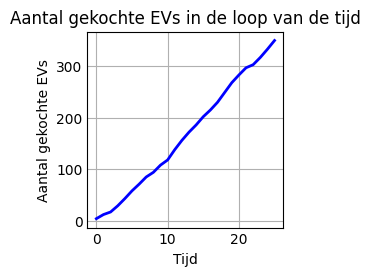

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Assuming model_data is defined somewhere earlier in your code
# Haal het aantal gekochte EV's uit de modelgegevens
aantal_gekochte_evs = model_data['Aantal gekochte EV'].tolist()

y = aantal_gekochte_evs
# Maak een array voor de tijd (stappen)
x = np.arange(len(aantal_gekochte_evs))

# Plot
fig, ax = plt.subplots()

# Plot het aantal gekochte EV's in de loop van de tijd
ax.plot(x, aantal_gekochte_evs, linewidth=2.0, color='blue')  # Use x as time steps

ax.set_xlabel('Tijd')
ax.set_ylabel('Aantal gekochte EVs')
ax.set_title('Aantal gekochte EVs in de loop van de tijd')

plt.show()


In [9]:
for i in range(108):
    model.step()
    

model_data = model.datacollector.get_model_vars_dataframe()

print(model_data)



     Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                     0.590436                   4                    1   
1                     0.590436                  12                    3   
2                     0.590436                  17                    3   
3                     0.590436                  29                    7   
4                     0.590436                  43                   10   
..                         ...                 ...                  ...   
129                   0.491615                1066                  808   
130                   0.491615                1069                  808   
131                   0.491615                1075                  820   
132                   0.491615                1078                  836   
133                   0.491615                1080                  836   

     Percentage huishoudens in bezit auto  Percerntage EV's van Auto's  
0                         

In [16]:
import pandas as pd

selected_data = pd.DataFrame()

for i in range(1, 121, 12):  # Start vanaf 1 en stap met 12
    model_data_i = model.datacollector.get_model_vars_dataframe().iloc[[i]]
    selected_data = pd.concat([selected_data, model_data_i])

print(selected_data)


     Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
1                     0.590436                  12                    3   
13                    0.583204                 172                   35   
25                    0.576502                 350                  113   
37                    0.570289                 572                  175   
49                    0.564532                 655                  274   
61                    0.559195                 708                  319   
73                    0.554249                 757                  420   
85                    0.549666                 792                  507   
97                    0.545417                 868                  629   
109                   0.491615                 933                  728   

     Percentage huishoudens in bezit auto  Percerntage EV's van Auto's  
1                                   0.742                     0.006469  
13                          